<a href="https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch4_4_boston_housing_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "Tensorflow 2.0 Tutorial ch4.4 - 보스턴 주택 가격 데이터세트"
date: 2020-04-16T20:40:30+09:00
tags:
  - "Deep Learning"
  - "Python"
  - "Google Colab"
  - "Tensorflow 2.0"
  - "다항회귀"
  - "보스턴 주택 가격 데이터세트"
  - "Deep Learning Linear Regression"
  - "텐서플로 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
categories:
  - "Deep Learning"
  - "딥러닝"
  - "텐서플로 2.0"
  - "Python"
  - "Tensorflow 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
menu: 
  python:
    name: Tensorflow 2.0 Tutorial ch4.4 - 보스턴 주택 가격 데이터세트
---

## 공지

- 본 Tutorial은 교재 `시작하세요 텐서플로 2.0 프로그래밍`의 강사에게 국비교육 강의를 듣는 사람들에게 자료 제공을 목적으로 제작하였습니다. 

- 강사의 주관적인 판단으로 압축해서 자료를 정리하였기 때문에, 자세하게 공부를 하고 싶은 반드시 교재를 구매하실 것을 권해드립니다. 

![](/img/tensorflow2.0/book.jpg)<!-- -->


- 본 교재 외에 강사가 추가한 내용에 대한 Reference를 확인하셔서, 추가적으로 학습하시는 것을 권유드립니다. 


## Tutorial

이전 강의가 궁금하신 분들은 아래에서 선택하여 추가 학습 하시기를 바랍니다. 

- [Google Colab Tensorflow 2.0 Installation](https://chloevan.github.io/python/tensorflow2.0/googlecolab/)
- [Tensorflow 2.0 Tutorial ch3.3.1 - 난수 생성 및 시그모이드 함수](https://chloevan.github.io/python/tensorflow2.0/ch3_3_1_random_signoid/)
- [Tensorflow 2.0 Tutorial ch3.3.2 - 난수 생성 및 시그모이드 함수 편향성](https://chloevan.github.io/python/tensorflow2.0/ch3_3_2_random_signoid_bias/)
- [Tensorflow 2.0 Tutorial ch3.3.3 - 첫번째 신경망 네트워크 - AND](https://chloevan.github.io/python/tensorflow2.0/ch3_3_3_network_and/)
- [Tensorflow 2.0 Tutorial ch3.3.4 - 두번째 신경망 네트워크 - OR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_4_network_or/)
- [Tensorflow 2.0 Tutorial ch3.3.5 - 세번째 신경망 네트워크 - XOR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_5_network_xor/)
- [Tensorflow 2.0 Tutorial ch4.1 - 선형회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_1_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.2 - 다항회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_2_multiple_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.3 - 딥러닝 네트워크를 이용한 회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_3_regression_with_deeplearning/)


## I. 개요 및 데이터 불러오기

딥러닝 네트워크를 이용한 회귀를 통해 보스턴 주택 가격 데이터세트(`Boston Housing Dataset`)을 이용한 주택 가격 예측 네트워크를 만들어본다. 

데이터세트에 기본적인 설명은 다음과 같다. 
- 1978년 미국 보스턴 지역의 주택 가격
- 506개의 타운의 주택 가격 중앙값을, 1,000달러 단위로 표현
- 범죄율
- 주택당 방 개수
- 고속도로까지의 거리 등

In [30]:
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


보스턴 주택 가격 데이터세트는 `keras`에 기본으로 탑재되어 있다. `load_data()` 함수를 사용해 데이터를 불러올 수 있는데, 이 때 훈련(`train`) 데이터와 테스트(`test`) 데이터를 나누게 된다. 

## II. 데이터 분리(훈련데이터 & 테스트데이터)

교재 `P.91-2`에 보면, 훈련 데이터, 검증 데이터, 테스트 데이터의 역할에 비교적 이해하기 쉽게 기술이 되어 있습니다. 이 부분을 처음 접하시는 분들은 꼭 한번 읽어보시기를 바랍니다. 

딥러닝과 관련해서 한가지 알아두면 좋은 것은 딥러닝 네트워크의 가중치에 영향을 주는 데이터는 훈련 데이터인데, 만약 교차검증(`cross-validation`)기법을 통하면 훈련 데이터 중 일부를 검증 데이터로 주는 비율을 바꿔가면서 학습시킬 수 있습니다. 

보스턴 주택 가격 데이터세트는 훈련 데이터가 `404`개, 테스트 데이터가 `102`개이며, 비율로 따지면 약 `80:20` 정도입니다. 

보스턴 주택 가격 데이터 속성은 아래와 같습니다. 

| 속성 	| 내용 	|
|:--------:	|:---------------------------------------------------------------------------------------------------------------:	|
| CRIM 	|  범죄율 |
| ZN 	| 25,000평방피트당 주거지역의 비율 	|
| INDUS 	| 비소매 상업지구 비율(단위: 에이커)	|
| CHAS 	| 찰스강에 인접해 있으면 1, 그렇지 않으면 0	|
| NOX 	| 일산화질소 농도(단위:0.1ppm)	|
| RM 	| 주택당 방의 수	|
| AGE 	| 1940년 이전에 건설된 주택의 비율	|
| DIS 	| 5개의 보스턴 직업고용센터와의 거리(가중 평균)	|
| RAD 	| 고속도로 접근성	|
| TAX 	| 재산세율	|
| PTRATIO 	| 학생/교사비율	|
| B 	| 흑인비율	|
| LSTAT 	| 하위계층비율	|
| MEDV 	| 타운의 주택 가격 중앙값(단위: 1,000달러	|

딥러닝 모형을 만들기전, 데이터 전처리를 진행해야 하는데 이것과 관련한 논쟁거리를 하나 소개합니다. 

## III. 언제 데이터 정규화를 해야할까? 
데이터 정규화의 기본적인 방법은 각 데이터에서 평균값을 뺀 다음 표준편차로 나눕니다. 그런데, 한가지 궁금한 것이 있다면, 데이터 정규화를 훈련 데이터와 테스트 데이터를 나누기 전에 해야 하는 것이 맞는 것인지, 아니면 나눈 후에 하는 것이 맞는 것인지, 헷갈릴 때가 종종 있습니다. 

스택오버플로우에 이러한 내용을 토대로 나온 좋은 토론글이 있습니다. 
- [Normalize data before or after split of training and testing data?](http://bit.ly/2JDmJ1D)

순서는 다음과 같습니다. 
1. 먼저 데이터를 분리합니다. 
2. 훈련데이터를 가지고 정규화를 진행합니다. 
3. 정규화를 진행한 이후, 훈련데이터 정규화로 나온 값의 평균과 분산을 확인합니다. 
4. 훈련데이터 평균과 분산을 가지고 테스트 데이터를 정규화합니다. 
5. 모형을 생성합니다. 

검증 데이터도 마찬가지입니다. 이제 코드를 작성합니다. 

In [31]:
# 4.12 데이터 전처리(정규화)
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


## IV. 딥러닝 네트워크 학습

정규화가 완료된 이후에는 시퀀셜 모델을 활용하여 딥러닝 네트워크를 학습 시킵니다. 

In [21]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13, )), 
  tf.keras.layers.Dense(units=39, activation='relu'), 
  tf.keras.layers.Dense(units=26, activation='relu'), 
  tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_5 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_6 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


코드 설명은 다음과 같습니다. 

- 첫 번째 레이어에서는 X 데이터의 속성을 모두 불러오기 위해 `input_shape`의 첫 번째 차원을 13으로 지정합니다. 
- 마지막 레이어는 주택가격인 Y값 1개만 예측하면 되기 때문에 뉴런의 수가 1개입니다. 
- 활성화함수로는 `relu`만 사용합니다. 
- 모델 정의가 끝나면 `model.fit()` 함수로 회귀 모델을 학습시킵니다. 

### (1) 그림 4.5. 출력 코드

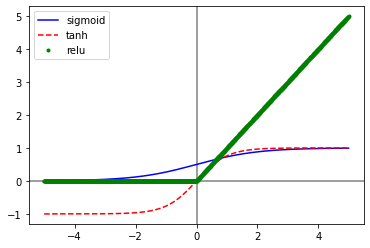

In [22]:
# 그림 4.5 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

In [32]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2009 - val_loss: 0.4002
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2382 - val_loss: 0.2915
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2133 - val_loss: 0.2996
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2024 - val_loss: 0.3201
Epoch 5/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1887 - val_loss: 0.3605
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2041 - val_loss: 0.3185
Epoch 7/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1815 - val_loss: 0.2961
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1984 - val_loss: 0.3034
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2154 - val_loss: 0.3473
Epoch 10/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2441 - val_loss: 0.3394
Epoch 11/25
10/10 [

코드 설명 및 출력 결과에 대한 해석은 다음과 같습니다. 

- `validation_split`은 훈련데이터에서 일정 비율로 떼서 학습 결과를 검증하기 위한 것입니다. 출력의 경향을 보면, `loss`는 꾸준하게 감소하지만, `val_loss`는 `loss`보다 높은 값을 유지하는 것을 볼 수 있습니다. 

이를 시각화하면 다음과 같습니다. 

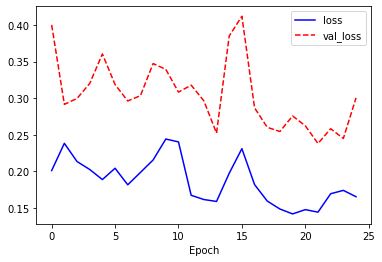

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

훈련 데이터의 손실은 꾸준히 감소하지만, 검증데이터의 손실이 항상 감소하는 것은 아닙니다. 모형이 마음에 드는 것이나 일단 회귀 모형을 평가해봅니다. 

In [28]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 8023.7656


8023.765625

테스트 데이터의 손실은 `0.9155`가 나옵니다. 위 그래프에서 훈련 데이터가 보여주는 `0.6` 정도의 낮은 손실과는 거리가 있어 보입니다. 

네트워크가 `Y`값을 얼마나 잘 예측하는지 확인해보기 위해 실제 주택 가격과 예측 주택 가격을 `1:1`로 비교해봅니다. 

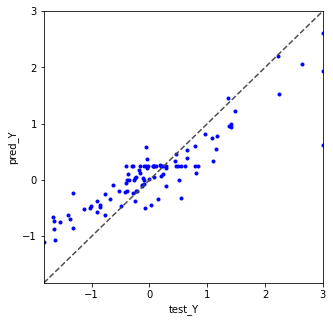

In [39]:
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()


## V. 모형 업그레이드

검증 데이터와 테스트 데이터에 대해 모두 좋은 예측 성적을 내려면 어떻게 해야 할까요? 검증 데이터와 테스트 데이터는 훈련 데이터아 달리 네트워크의 가중치에 영향을 미치지 않는다는 공통점이 있으니, 이를 활용합니다. 이 때, 검증 데이터에 대한 성적이 좋아지려면 `val_loss`가 높아지지 않도록, 즉 네트워크가 훈련 데이터에 과적합되지 않도록 학습 도중에 끼어들어서 학습을 멈추도록 합니다. 

학습 도중에 끼어들기 위해서는 콜백(`callback`) 함수를 사용합니다. 콜백 함수는 모델을 학습할 때 에포크가 끝날 때마다 호출됩니다. 

In [40]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13, )), 
  tf.keras.layers.Dense(units=39, activation='relu'), 
  tf.keras.layers.Dense(units=26, activation='relu'), 
  tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 0s 10ms/step - loss: 1.2692 - val_loss: 0.6573
Epoch 2/25
10/10 [==============================] - 0s 4ms/step - loss: 0.3468 - val_loss: 0.3027
Epoch 3/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2343 - val_loss: 0.3601
Epoch 4/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2485 - val_loss: 0.2040
Epoch 5/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1606 - val_loss: 0.1463
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1371 - val_loss: 0.1716
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1561 - val_loss: 0.1441
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1223 - val_loss: 0.1498
Epoch 9/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0983 - val_loss: 0.1318
Epoch 10/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0915 - val_loss: 0.1206
Epoch 11/25
10/10 

`tf.keras.callbacks.EarlyStopping`는 말 그대로 학습을 일찍 멈추는 기능을 하는 함수로, `patience`는 몇 번의 에포크를 기준으로 삼을 것인지, `monitor`는 어떤 값을 지켜볼 것인지에 대한 인수입니다. 여기서는 `val_loss`가 3회의 에포크를 수행하는 동안 최고 기록을 갱신하지 못하면 학습을 멈춥니다. 즉, 10 에포크에서 `0.1206`이 최고치인데, 11, 12, 13에서 갱신하지 못했기 때문에 학습을 멈췄습니다. 

이를 다시 시각화하면 아래와 같습니다. 

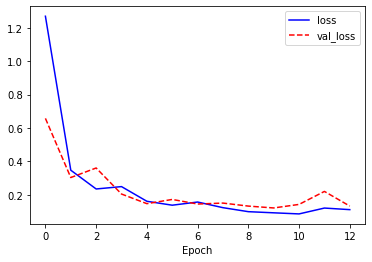

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

검증 데이터의 손실에서 뚜렷한 증가세는 조금 덜 보입니다. 모형을 평가한뒤 다시 실제 주택 가격과 예측 주택 가격을 1:1로 시각홰봅니다. 

4/4 [==============================] - 0s 2ms/step - loss: 0.3753


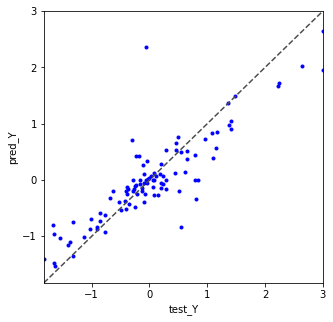

In [42]:
import matplotlib.pyplot as plt

model.evaluate(test_X, test_Y)
pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

조금 더 모형이 다듬어진 것을 볼 수 있습니다. 이렇게 EarlyStopping을 활용하면 과적합 방지도 가능한 기법을 배웠습니다. 

이제 분류로 넘어갑니다. 

## VI. 연습 파일
- [구글 Colab에서 직접 연습해보자](https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch4_4_boston_housing_deeplearning.ipynb) 

## VII. Reference

김환희. (2020). 시작하세요! 텐서플로 2.0 프로그래밍: 기초 이론부터 실전 예제까지 한번에 끝내는 머신러닝, 딥러닝 핵심 가이드. 서울: 위키북스.